#Import & Load Data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(
    "/Workspace/Users/katlegomadihla@gmail.com/Retail/sales_data_sample.csv",
    encoding="ISO-8859-1"
)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


The above data has been cleaned

In [0]:
df.shape



(2823, 25)

INSPECT DATA

Data type in the columns 

In [0]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


To provide a distribution Summary 

In [0]:

df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


Data check for missing information in each column

In [0]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

CLEAN COLUMN NAMES
 Remove the missing data

In [0]:
df.dropna(inplace=True)
df.columns = df.columns.str.lower().str.replace(" ", "_")


Convert the date 

In [0]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])


Extract date features

In [0]:
df["year"] = df["ORDERDATE"].dt.year
df["month"] = df["ORDERDATE"].dt.month
df["quarter"] = df["ORDERDATE"].dt.quarter
df["day_of_week"] = df["ORDERDATE"].dt.day_name()

#EDA 

Sales Trends Over Time

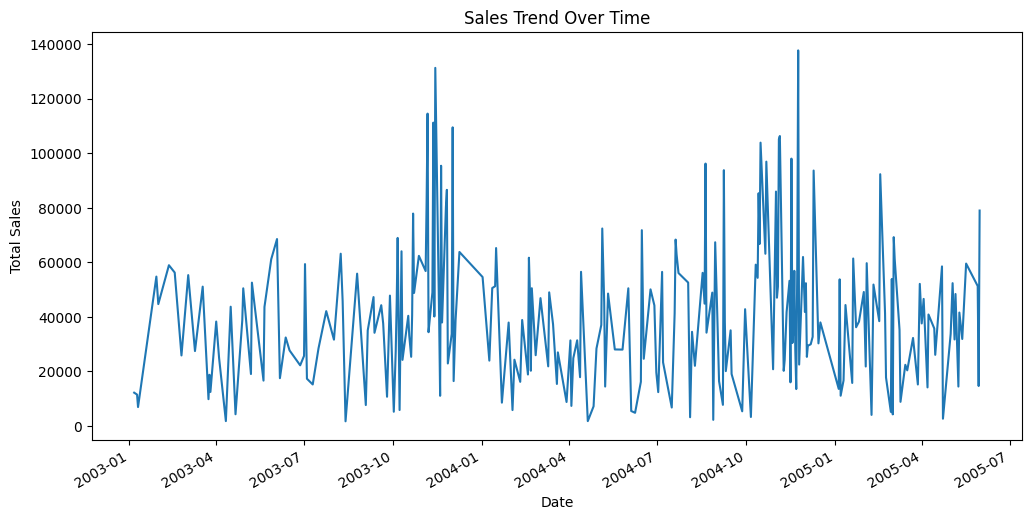

In [0]:
plt.figure(figsize=(12,6))
df.groupby("ORDERDATE")["SALES"].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

Sales per month 

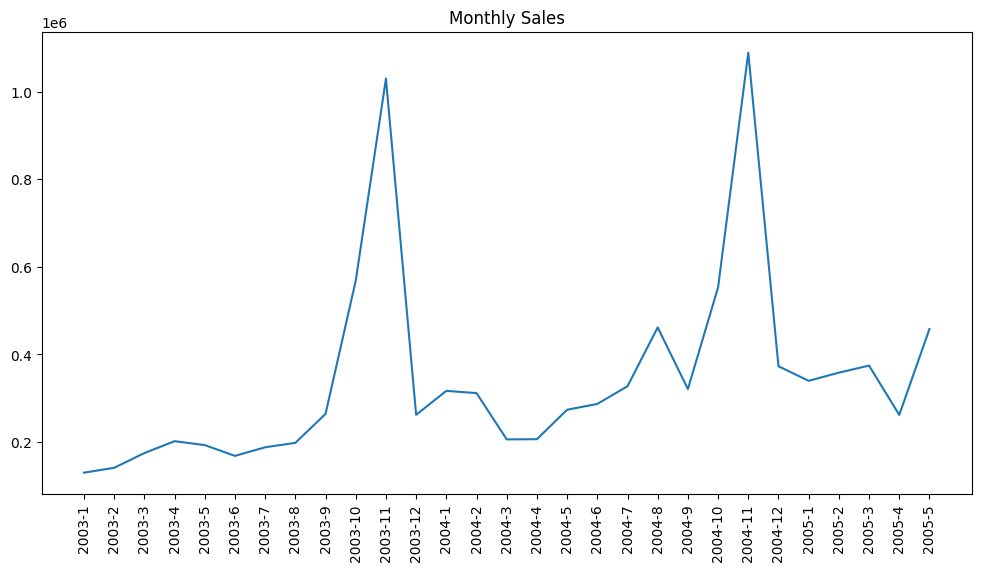

In [0]:
monthly = df.groupby(["year","month"])["SALES"].sum().reset_index()
monthly["year_month"] = monthly["year"].astype(str) + "-" + monthly["month"].astype(str)

plt.figure(figsize=(12,6))
plt.plot(monthly["year_month"], monthly["SALES"])
plt.xticks(rotation=90)
plt.title("Monthly Sales")
plt.show()

Sales per Productline

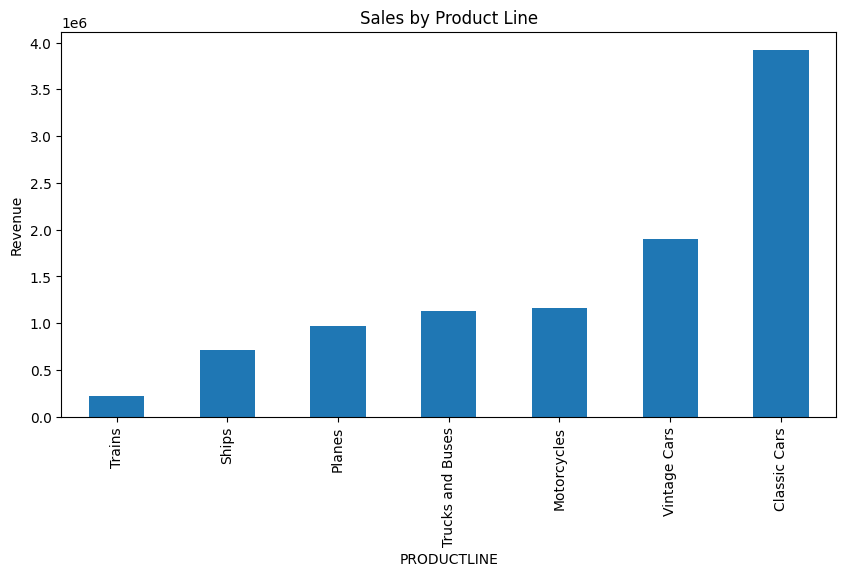

In [0]:
plt.figure(figsize=(10,5))
df.groupby("PRODUCTLINE")["SALES"].sum().sort_values().plot(kind="bar")
plt.title("Sales by Product Line")
plt.ylabel("Revenue")
plt.show()

##Sales Per country 

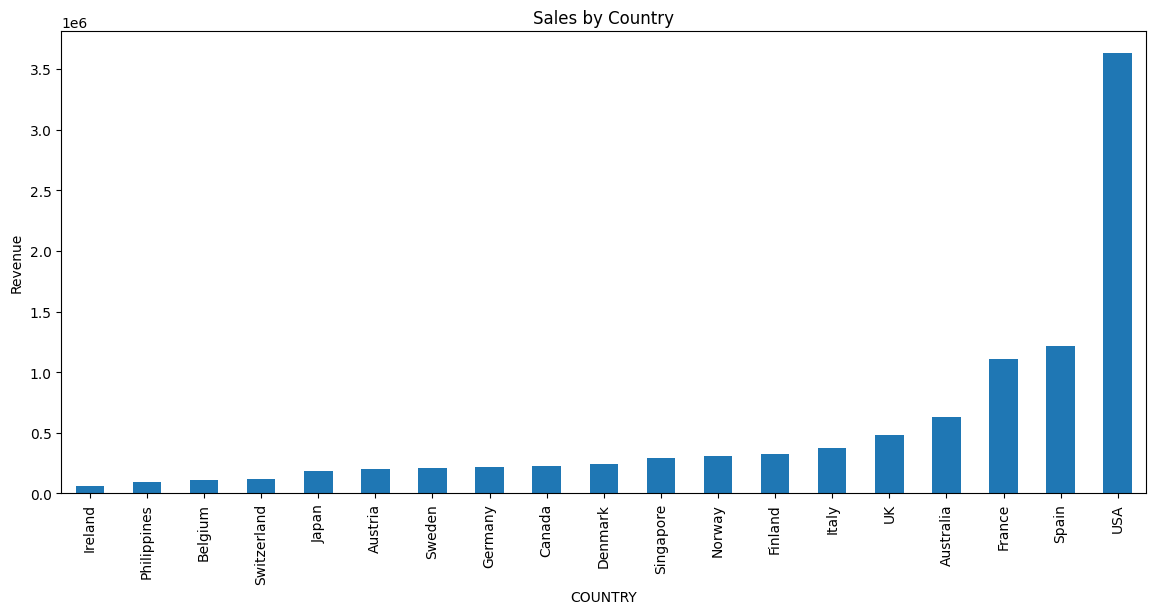

In [0]:
plt.figure(figsize=(14,6))
df.groupby("COUNTRY")["SALES"].sum().sort_values().plot(kind="bar")
plt.title("Sales by Country")
plt.ylabel("Revenue")
plt.show()


Dealsize Distribution 
-Univariable analysis

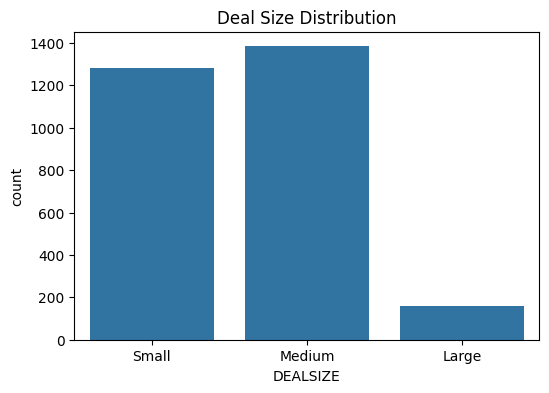

In [0]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="DEALSIZE")
plt.title("Deal Size Distribution")
plt.show()

##Distribution 

Bivariable 

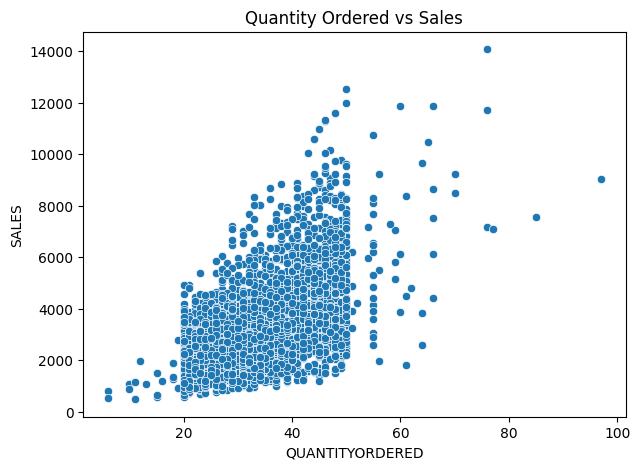

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="QUANTITYORDERED", y="SALES")
plt.title("Quantity Ordered vs Sales")
plt.show()

Correlation Check

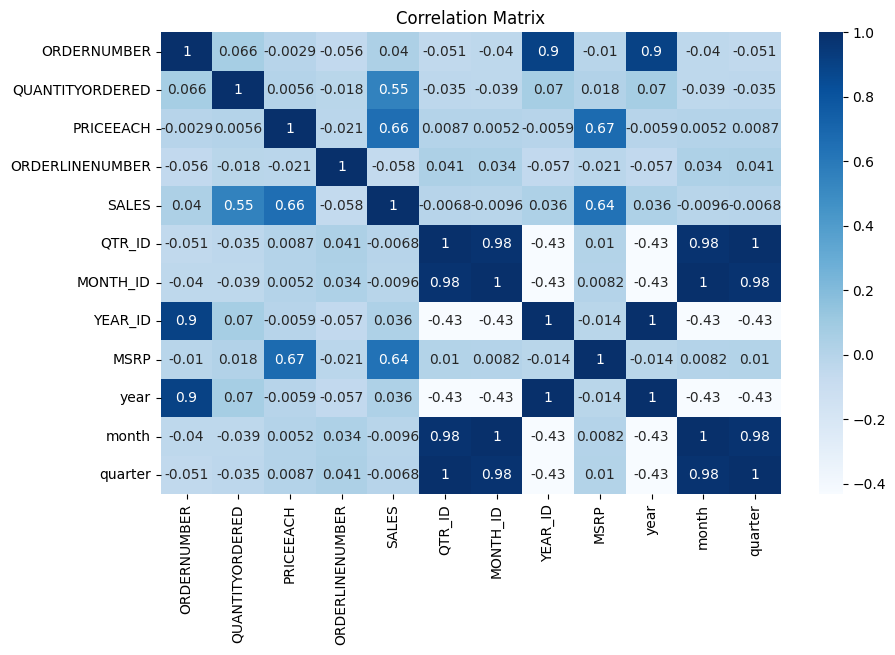

In [0]:
numeric_df = df.select_dtypes(include=["number"])
# Create a heatmap select the datatype to correctly align the number items
plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="Blues"
)
plt.title("Correlation Matrix")
plt.show()